<a href="https://colab.research.google.com/github/7pupuwen/PCB_QDETECTION/blob/main/PCB_Detection_8.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d norbertelter/pcb-defect-dataset -q
!unzip -q pcb-defect-dataset.zip -d pcb_data

Dataset URL: https://www.kaggle.com/datasets/norbertelter/pcb-defect-dataset
License(s): unknown


In [2]:
! pip install pennylane -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 24.7 MB/s eta 0:00:00


In [3]:
import os
import pandas as pd

# Set the label files
train_labels_path = "/content/pcb_data/pcb-defect-dataset/train/labels"
val_labels_path = "/content/pcb_data/pcb-defect-dataset/val/labels"
test_labels_path = "/content/pcb_data/pcb-defect-dataset/test/labels"

# Definition of convert label to csv
def convert_labels_to_csv(labels_path, output_csv):
    data = []

    # read every .txt file
    for file in os.listdir(labels_path):
        if file.endswith(".txt"):
            file_path = os.path.join(labels_path, file)
            image_name = file.replace(".txt", ".jpg")  # The file name corresponding to the image
            with open(file_path, "r") as f:
                lines = f.readlines()  #A .txt may have multiple lines of tags

                for line in lines:
                    values = line.strip().split()
                    class_id = int(values[0])  # Defect category
                    x_center, y_center, width, height = map(float, values[1:])  # Analyze numerical values

                    # Save to DataFrame
                    data.append([image_name, class_id, x_center, y_center, width, height])

    # create DataFrame
    df = pd.DataFrame(data, columns=["image_name", "class_id", "x_center", "y_center", "width", "height"])

    # Save as CSV
    df.to_csv(output_csv, index=False)

    print(f"{output_csv} convert finish！")
    print(df.head(10))  # show the first 10 data

# covert `train`、`val`、`test` labels
convert_labels_to_csv(train_labels_path, "train_labels.csv")
convert_labels_to_csv(val_labels_path, "val_labels.csv")
convert_labels_to_csv(test_labels_path, "test_labels.csv")

train_labels.csv convert finish！
                                        image_name  class_id  x_center  \
0         rotation_270_light_12_short_08_3_600.jpg         3    0.6797   
1         rotation_270_light_12_short_08_3_600.jpg         3    0.1872   
2         rotation_270_light_12_short_08_3_600.jpg         3    0.2621   
3          l_light_08_spurious_copper_10_5_600.jpg         5    0.6908   
4          l_light_08_spurious_copper_10_5_600.jpg         5    0.1367   
5          rotation_90_light_09_short_10_2_600.jpg         3    0.0992   
6          rotation_90_light_09_short_10_2_600.jpg         3    0.2083   
7  rotation_270_light_06_open_circuit_02_3_600.jpg         4    0.9601   
8  rotation_270_light_06_open_circuit_02_3_600.jpg         4    0.8469   
9                       light_01_spur_15_1_256.jpg         1    0.4575   

   y_center   width  height  
0    0.5932  0.0383  0.0582  
1    0.7171  0.0616  0.0366  
2    0.1647  0.0383  0.0366  
3    0.6042  0.0283  0.0817  
4 

In [4]:
import os
import cv2
import numpy as np
import pandas as pd

#Set up image folder
train_images_path = "/content/pcb_data/pcb-defect-dataset/train/images"
val_images_path = "/content/pcb_data/pcb-defect-dataset/val/images"
test_images_path = "/content/pcb_data/pcb-defect-dataset/test/images"

# Read tag CSV
train_labels_csv = "train_labels.csv"
val_labels_csv = "val_labels.csv"
test_labels_csv = "test_labels.csv"

# Define functions to read images and match tags
def load_images_and_labels(images_path, labels_csv):
    df = pd.read_csv(labels_csv)  # Read CSV
    X, y = [], []  # Store images and labels

    # Read images and match tags
    for _, row in df.iterrows():
        img_path = os.path.join(images_path, row["image_name"])

        if os.path.exists(img_path):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
            img = cv2.resize(img, (64, 64)) / 255.0  # standardization
            X.append(img)
            y.append(row["class_id"])  # Take only defect categories as labels

    # NumPy array
    X = np.array(X)
    y = np.array(y)

    print(f"{labels_csv} processed, image data size: {X.shape}, label data size: {y.shape}")
    return X, y

# read `train`、`val`、`test` data
X_train, y_train = load_images_and_labels(train_images_path, train_labels_csv)
X_val, y_val = load_images_and_labels(val_images_path, val_labels_csv)
X_test, y_test = load_images_and_labels(test_images_path, test_labels_csv)

train_labels.csv processed, image data size: (12991, 64, 64), label data size: (12991,)
val_labels.csv processed, image data size: (1595, 64, 64), label data size: (1595,)
test_labels.csv processed, image data size: (1662, 64, 64), label data size: (1662,)


In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

# take 500 data
X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=1500, random_state=42, stratify=y_train)
X_val, _, y_val, _ = train_test_split(X_val, y_val, train_size=1000, random_state=42, stratify=y_val)
X_test, _, y_test, _ = train_test_split(X_test, y_test, train_size=1000, random_state=42, stratify=y_test)

# Confirm data shape
print("取樣後的影像數據 (Train):", X_train.shape)  # (500, 64, 64)
print("取樣後的標籤數據 (Train):", y_train.shape)  # (500,)

print("取樣後的影像數據 (Val):", X_val.shape)  # (500, 64, 64)
print("取樣後的標籤數據 (Val):", y_val.shape)  # (500,)

print("取樣後的影像數據 (Test):", X_test.shape)  # (500, 64, 64)
print("取樣後的標籤數據 (Test):", y_test.shape)  # (500,)


取樣後的影像數據 (Train): (1500, 64, 64)
取樣後的標籤數據 (Train): (1500,)
取樣後的影像數據 (Val): (1000, 64, 64)
取樣後的標籤數據 (Val): (1000,)
取樣後的影像數據 (Test): (1000, 64, 64)
取樣後的標籤數據 (Test): (1000,)


(<Figure size 800x500 with 1 Axes>, <Axes: >)

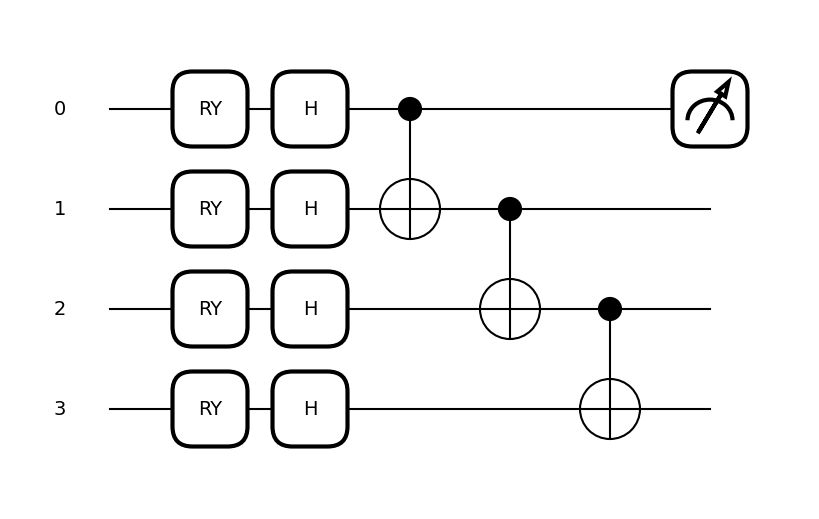

In [6]:
import pennylane as qml

# Set up the quantum computer simulator (4 qubits, corresponding to 2x2 patch)
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_kernel(x):
    """
    This is a quantum circuit that converts image patches into quantum features
    """
    for i in range(n_qubits):
        qml.RY(x[i] * np.pi, wires=i)  # Embedding image data using Ry gates
        qml.Hadamard(wires=i)  # Join Hadamard Gate

    # oin Quantum Entanglement
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i+1])

    return qml.expval(qml.PauliZ(0))  # Output quantum features

x_test = np.random.rand(4)  # 產生 4 個隨機數
qml.draw_mpl(quantum_kernel)(x_test)

In [7]:
def quanvolution(image):
    output_size = (image.shape[0] //2, image.shape[1] //2)
    q_image = np.zeros(output_size)

    for i in range(0, image.shape[0], 2):
        for j in range(0, image.shape[1], 2):
          patch = image[i:i+2, j:j+2].flatten()
          q_image[i//2, j//2] = quantum_kernel(patch)

    return q_image.flatten()

In [ ]:
# Do Quanvolution to data
# X_train_quanv = np.array([quanvolution(img) for img in X_train])
# X_val_quanv = np.array([quanvolution(img) for img in X_val])
# X_test_quanv = np.array([quanvolution(img) for img in X_test])

# print("Quantum feature size（Train）:", X_train_quanv.shape)
# print("Quantum feature size（Val）:", X_val_quanv.shape)
# print("Quantum feature size（Test）:", X_test_quanv.shape)


In [ ]:
# import numpy as np

# def compute_kernel_matrix(X):
#     """
#     Compute Quantum Kernel Matrix
#     - X: quantum eigenvector (N, d), where N is the number of samples and d is the number of features
#     - returns the Kernel matrix of (N, N)
#     """
#     N = len(X)
#     kernel_matrix = np.zeros((N, N))

#     for i in range(N):
#         for j in range(i, N):  # 只計算上三角矩陣（因為對稱）
#             kernel_matrix[i, j] = np.dot(X[i], X[j])  # 內積當作 Kernel
#             kernel_matrix[j, i] = kernel_matrix[i, j]  # 利用對稱性

#     return kernel_matrix

In [ ]:
#rbf kernel

# def compute_kernel_matrix(X, gamma=0.5):
#     N = len(X)
#     kernel_matrix = np.zeros((N, N))

#     for i in range(N):
#         for j in range(i, N):
#             dist = np.linalg.norm(X[i] - X[j]) ** 2
#             kernel_matrix[i, j] = np.exp(-gamma * dist)  # Gaussian Kernel
#             kernel_matrix[j, i] = kernel_matrix[i, j]

#     return kernel_matrix

In [ ]:
# Quantum Kernel Matrix
# train_kernel_matrix = compute_kernel_matrix(X_train_quanv)
# val_kernel_matrix = np.array([[np.dot(x1, x2) for x2 in X_train_quanv] for x1 in X_val_quanv])
# test_kernel_matrix = np.array([[np.dot(x1, x2) for x2 in X_train_quanv] for x1 in X_test_quanv])

# print("Train Kernel Matrix:", train_kernel_matrix.shape)  # (N_train, N_train)
# print("Val Kernel Matrix:", val_kernel_matrix.shape)      # (N_val, N_train)
# print("Test Kernel Matrix:", test_kernel_matrix.shape)    # (N_test, N_train)

In [ ]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score

# # train Quantum SVM
# qsvm = svm.SVC(kernel="precomputed")
# qsvm.fit(train_kernel_matrix, y_train)


In [ ]:
# # test  QSVM in val set
# preds_val = qsvm.predict(val_kernel_matrix)
# accuracy_val = accuracy_score(y_val, preds_val)
# print(f"QSVM Validation Accuracy: {accuracy_val:.4f}")

# # test QSVM in test set
# preds_test = qsvm.predict(test_kernel_matrix)
# accuracy_test = accuracy_score(y_test, preds_test)
# print(f"QSVM Test Accuracy: {accuracy_test:.4f}")


In [8]:
# Choose label=0&1
X_train_0 = X_train[y_train == 0]
y_train_0 = y_train[y_train == 0]

X_train_1 = X_train[y_train == 1]
y_train_1 = y_train[y_train == 1]

X_val_0 = X_val[y_val == 0]
y_val_0 = y_val[y_val == 0]

X_val_1 = X_val[y_val == 1]
y_val_1 = y_val[y_val == 1]

X_test_0 = X_test[y_test == 0]
y_test_0 = y_test[y_test == 0]

X_test_1 = X_test[y_test == 1]
y_test_1 = y_test[y_test == 1]

print(f"label=0 訓練數據數量: {X_train_0.shape}")
print(f"label=0 訓練數據數量: {X_val_0.shape}")
print(f"label=0 訓練數據數量: {X_test_0.shape}")

print(f"訓練資料 label=1 數量: {X_train_1.shape}")
print(f"驗證資料 label=1 數量: {X_val_1.shape}")
print(f"測試資料 label=1 數量: {X_test_1.shape}")


label=0 訓練數據數量: (256, 64, 64)
label=0 訓練數據數量: (176, 64, 64)
label=0 訓練數據數量: (158, 64, 64)
訓練資料 label=1 數量: (252, 64, 64)
驗證資料 label=1 數量: (164, 64, 64)
測試資料 label=1 數量: (168, 64, 64)


In [9]:
X_train_0 = np.array([quanvolution(img) for img in X_train_0])
X_val_0 = np.array([quanvolution(img) for img in X_val_0])
X_test_0 = np.array([quanvolution(img) for img in X_test_0])

print(" X_train_0 shape:", X_train_0.shape)  # (84, 特徵數)
print(" X_val_0 shape:", X_val_0.shape)      # (88, 特徵數)
print("X_test_0 shape:", X_test_0.shape)    # (79, 特徵數)

 X_train_0 shape: (256, 1024)
 X_val_0 shape: (176, 1024)
X_test_0 shape: (158, 1024)


In [10]:
X_train_1 = np.array([quanvolution(img) for img in X_train_1])
X_val_1 = np.array([quanvolution(img) for img in X_val_1])
X_test_1 = np.array([quanvolution(img) for img in X_test_1])

print(" X_train_1 shape:", X_train_1.shape)  # (84, 特徵數)
print(" X_val_1 shape:", X_val_1.shape)      # (82, 特徵數)
print("X_test_1 shape:", X_test_1.shape)    # (84, 特徵數)

 X_train_1 shape: (252, 1024)
 X_val_1 shape: (164, 1024)
X_test_1 shape: (168, 1024)


In [11]:
# 合併 label=0 和 label=1 的量子特徵數據
X_train_01 = np.vstack([X_train_0, X_train_1])
y_train_01 = np.hstack([y_train_0, y_train_1])

print(f"合併後的訓練數據: {X_train_01.shape}")
print(f"合併後的標籤數據: {y_train_01.shape}")

X_val_01 = np.vstack([X_val_0, X_val_1])
y_val_01 = np.hstack([y_val_0, y_val_1])

print(f"合併後的訓練數據: {X_val_01.shape}")
print(f"合併後的標籤數據: {y_val_01.shape}")

X_test_01 = np.vstack([X_test_0, X_test_1])
y_test_01 = np.hstack([y_test_0, y_test_1])

print(f"合併後的訓練數據: {X_test_01.shape}")
print(f"合併後的標籤數據: {y_test_01.shape}")

合併後的訓練數據: (508, 1024)
合併後的標籤數據: (508,)
合併後的訓練數據: (340, 1024)
合併後的標籤數據: (340,)
合併後的訓練數據: (326, 1024)
合併後的標籤數據: (326,)


In [12]:
from sklearn.decomposition import PCA
# 先把影像攤平成 2D 數據 (N, 4096)
X_train_flat = X_train_01.reshape(X_train_01.shape[0], -1)
X_val_flat = X_val_01.reshape(X_val_01.shape[0], -1)
X_test_flat = X_test_01.reshape(X_test_01.shape[0], -1)

# 使用 PCA 降維
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_flat)
X_val_pca = pca.fit_transform(X_val_flat)
X_test_pca = pca.fit_transform(X_test_flat)

print("降維後的數據形狀：", X_train_pca.shape)  # (N, 4)
print("降維後的數據形狀：", X_val_pca.shape)  # (N, 4)


降維後的數據形狀： (508, 4)
降維後的數據形狀： (340, 4)


In [ ]:
# import pennylane as qml
# import pennylane.numpy as np

# n_qubits = 4
# dev = qml.device("default.qubit", wires=n_qubits)

# @qml.qnode(dev)
# def feature_map(x):
#     # 將輸入 x（維度 4 的向量）嵌入到量子態中
#     qml.AngleEmbedding(x, wires=range(n_qubits))
#     # 回傳每個 qubit 上 Pauli-Z 的期望值，形成一個 4 維向量
#     return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]


In [ ]:
# def quantum_kernel_fidelity(x1, x2):
#     phi1 = np.array(feature_map(x1))
#     phi2 = np.array(feature_map(x2))
#     # 使用內積的平方作為核值
#     return np.dot(phi1, phi2)**2

In [ ]:
# def compute_quantum_kernel_matrix(X, kernel_func=quantum_kernel_fidelity):
#     N = len(X)
#     K = np.zeros((N, N))
#     for i in range(N):
#         for j in range(i, N):
#             K[i, j] = kernel_func(X[i], X[j])
#             K[j, i] = K[i, j]
#     return K

In [13]:
import pennylane as qml
import pennylane.numpy as np  # PennyLane 版本的 numpy
import numpy as onp          # 傳統 NumPy，避免混淆時可用 "onp"

n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def feature_map(x):
    """
    將輸入 x (長度 <= n_qubits) 嵌入到量子態中，
    回傳每個 qubit 上 PauliZ 的期望值，形成一個長度 = n_qubits 的向量。
    """
    qml.AngleEmbedding(x, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

def quantum_kernel_fidelity(x1, x2):
    """
    量子核函數：先透過 feature_map() 得到兩個量子特徵向量 phi1, phi2，
    然後取內積 (dot) 再平方，作為「類似保真度」的核值。
    """
    # feature_map(x) 回傳的是一個可微的 list[ArrayBox, ...]
    # 用 qml.math.stack() 把它變成同一個張量
    phi1 = qml.math.stack(feature_map(x1))
    phi2 = qml.math.stack(feature_map(x2))

    # 內積 (dot) → dot**2
    dot_value = qml.math.dot(phi1, phi2)
    kernel_val = dot_value**2

    # 有時需要轉成 Python float 或 onp.float64 才能塞到 Kernel Matrix
    # 這裡用 qml.math.toarray() 轉成可用的數值
    return qml.math.toarray(kernel_val)

def compute_quantum_kernel_matrix(X, kernel_func=quantum_kernel_fidelity):
    """
    給定一組資料 X (shape: (N, d))，計算 N×N 的量子核矩陣。
    """
    N = len(X)
    K = onp.zeros((N, N))  # 這裡用傳統 NumPy array 來存放 kernel
    for i in range(N):
        for j in range(i, N):
            val = kernel_func(X[i], X[j])
            K[i, j] = val
            K[j, i] = val
    return K


In [15]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# 假設 X_train.shape = (N_train, d)，y_train.shape = (N_train,)
K_train = compute_quantum_kernel_matrix(X_train_pca, quantum_kernel_fidelity)
K_val   = compute_quantum_kernel_matrix(X_val_pca,   quantum_kernel_fidelity)
K_test  = compute_quantum_kernel_matrix(X_test_pca,  quantum_kernel_fidelity)

print(f"Train Kernel Matrix: {K_train.shape}")
print(f"Val Kernel Matrix: {K_val.shape}")
print(f"Test Kernel Matrix: {K_test.shape}")



Train Kernel Matrix: (508, 508)
Val Kernel Matrix: (340, 340)
Test Kernel Matrix: (326, 326)


In [16]:
# 使用 precomputed kernel 的 SVM
qsvm = svm.SVC(kernel="precomputed")
qsvm.fit(K_train, y_train)

# 驗證
val_preds = qsvm.predict(K_val)
val_acc   = accuracy_score(y_val, val_preds)
print(f"Validation Accuracy: {val_acc:.4f}")

# 測試
test_preds = qsvm.predict(K_test)
test_acc   = accuracy_score(y_test, test_preds)
print(f"Test Accuracy: {test_acc:.4f}")
######

ValueError: Found input variables with inconsistent numbers of samples: [508, 1500]

In [14]:
# K_train = compute_quantum_kernel_matrix(X_train_pca)
# K_val = compute_quantum_kernel_matrix(X_val_pca)
# K_test = compute_quantum_kernel_matrix(X_test_pca)



Train Kernel Matrix: (508, 508)
Val Kernel Matrix: (340, 340)
Test Kernel Matrix: (326, 326)


In [ ]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score

# qsvm = svm.SVC(kernel="precomputed")
# qsvm.fit(K_train, y_train_01)

# val_preds = qsvm.predict(K_val)
# test_preds = qsvm.predict(K_test)

# val_acc = accuracy_score(y_val_01, val_preds)
# test_acc = accuracy_score(y_test_01, test_preds)

# print(f"QSVM Validation Accuracy: {val_acc:.4f}")
# print(f"QSVM Test Accuracy: {test_acc:.4f}")


ValueError: X has 340 features, but SVC is expecting 508 features as input.

In [ ]:
print("X_train shape:", K_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", K_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (508, 508)
y_train shape: (1500,)
X_val shape: (340, 340)
y_val shape: (1000,)


In [ ]:
print("train_kernel_matrix shape:", K_train.shape)
print("val_kernel_matrix shape:", K_val.shape)


train_kernel_matrix shape: (508, 508)
val_kernel_matrix shape: (340, 340)


In [ ]:
# 計算 Kernel Matrix（只使用 label=1 的數據）
# train_kernel_matrix_01 = compute_kernel_matrix(X_train_01)
# val_kernel_matrix_01 = np.array([[np.dot(x1, x2) for x2 in X_train_01] for x1 in X_val_01])
# test_kernel_matrix_01 = np.array([[np.dot(x1, x2) for x2 in X_train_01] for x1 in X_test_01])

# print(f"Train Kernel Matrix (label=1): {train_kernel_matrix_01.shape}")
# print(f"Val Kernel Matrix (label=1): {val_kernel_matrix_01.shape}")
# print(f"Test Kernel Matrix (label=1): {test_kernel_matrix_01.shape}")

Train Kernel Matrix (label=1): (509, 509)
Val Kernel Matrix (label=1): (340, 509)
Test Kernel Matrix (label=1): (326, 509)


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# 訓練 Quantum SVM
qsvm = svm.SVC(kernel="precomputed")
qsvm.fit(train_kernel_matrix_01, y_train_01)

# 測試 QSVM 在驗證集
preds_val_1 = qsvm.predict(val_kernel_matrix_01)
accuracy_val_1 = accuracy_score(y_val_01, preds_val_1)
print(f"QSVM Validation Accuracy (label=01): {accuracy_val_1:.4f}")

# 測試 QSVM 在測試集
preds_test_1 = qsvm.predict(test_kernel_matrix_01)
accuracy_test_1 = accuracy_score(y_test_01, preds_test_1)
print(f"QSVM Test Accuracy (label=01): {accuracy_test_1:.4f}")

QSVM Validation Accuracy (label=01): 0.4824
QSVM Test Accuracy (label=01): 0.5153


In [ ]:
# 傳統 SVM（使用 RBF 核）
classical_svm = svm.SVC(kernel="rbf")
classical_svm.fit(X_train_01, y_train_01)
preds_classical = classical_svm.predict(X_test_01)
val_preds_classical = classical_svm.predict(X_val_01)
acc_classical = accuracy_score(y_test_01, preds_classical)
val_classical = accuracy_score(y_val_01, val_preds_classical)

print(f"Classical SVM Accuracy: {val_classical:.4f}")
print(f"Classical SVM Accuracy: {acc_classical:.4f}")

Classical SVM Accuracy: 0.4353
Classical SVM Accuracy: 0.5000
